<a href="https://colab.research.google.com/github/berkozbek20/PawConnect/blob/main/wine_quality_ml.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd

url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
df = pd.read_csv(url, sep=';')

df.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df.isnull().sum()


,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


In [6]:
df['quality'].value_counts().sort_index()


,count
quality,
3,10
4,53
5,681
6,638
7,199
8,18


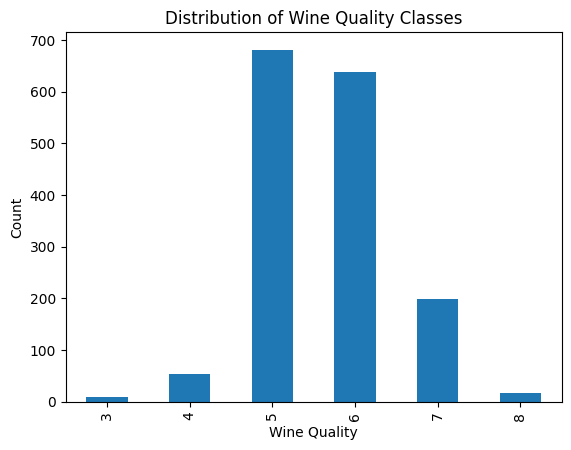

In [7]:
import matplotlib.pyplot as plt

df['quality'].value_counts().sort_index().plot(kind='bar')
plt.xlabel("Wine Quality")
plt.ylabel("Count")
plt.title("Distribution of Wine Quality Classes")
plt.show()


In [8]:
X = df.drop("quality", axis=1)
y = df["quality"]


In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=31,
    stratify=y
)


In [10]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, accuracy_score

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

print("Naive Bayes Accuracy:", accuracy_score(y_test, y_pred_nb))
print(classification_report(y_test, y_pred_nb))


Naive Bayes Accuracy: 0.503125
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.60      0.59      0.59       136
           6       0.48      0.47      0.47       128
           7       0.47      0.53      0.49        40
           8       0.00      0.00      0.00         3

    accuracy                           0.50       320
   macro avg       0.26      0.26      0.26       320
weighted avg       0.50      0.50      0.50       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


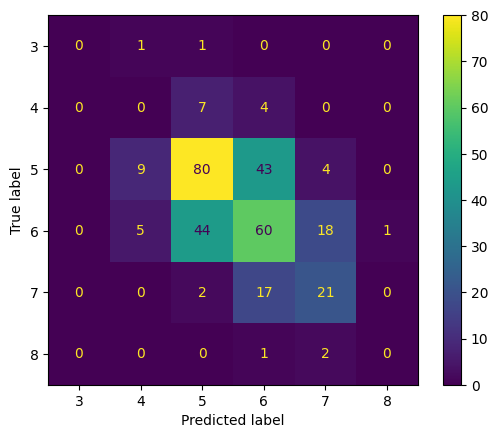

In [11]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_nb)


In [12]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(
    criterion="gini",
    random_state=42
)

dt.fit(X_train, y_train)
y_pred_dt = dt.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))


Decision Tree Accuracy: 0.61875
              precision    recall  f1-score   support

           3       1.00      0.50      0.67         2
           4       0.08      0.09      0.08        11
           5       0.68      0.71      0.69       136
           6       0.61      0.62      0.61       128
           7       0.62      0.53      0.57        40
           8       0.00      0.00      0.00         3

    accuracy                           0.62       320
   macro avg       0.50      0.41      0.44       320
weighted avg       0.62      0.62      0.62       320



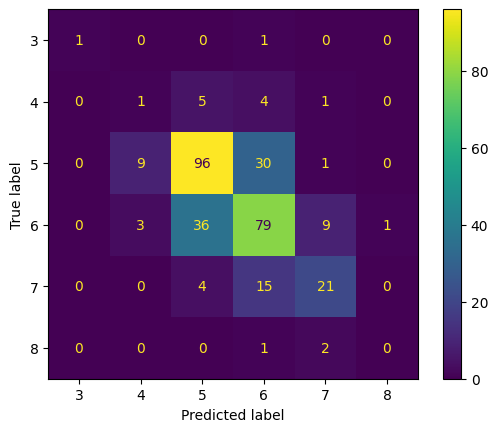

In [15]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_dt)


**Scaling**

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [17]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

y_pred_knn = knn.predict(X_test_scaled)

print("KNN Accuracy:", accuracy_score(y_test, y_pred_knn))
print(classification_report(y_test, y_pred_knn))


KNN Accuracy: 0.55
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.61      0.66      0.64       136
           6       0.51      0.56      0.54       128
           7       0.48      0.35      0.41        40
           8       0.00      0.00      0.00         3

    accuracy                           0.55       320
   macro avg       0.27      0.26      0.26       320
weighted avg       0.53      0.55      0.54       320



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


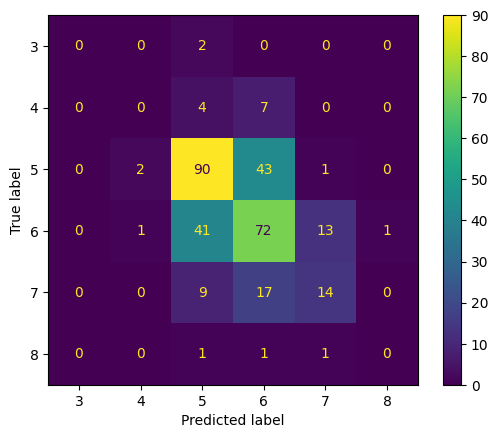

In [19]:
from sklearn.metrics import ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)

In [22]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

rf = RandomForestClassifier(
    n_estimators=300,      # ağaç sayısı (artınca genelde stabil olur)
    random_state=42,
    n_jobs=-1,             # paralel çalıştırır (colab hızlanır)
    class_weight=None      # istersen "balanced" deneyebiliriz
)

rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf, zero_division=0))


Random Forest Accuracy: 0.7
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        11
           5       0.73      0.82      0.78       136
           6       0.68      0.71      0.69       128
           7       0.66      0.53      0.58        40
           8       0.00      0.00      0.00         3

    accuracy                           0.70       320
   macro avg       0.34      0.34      0.34       320
weighted avg       0.66      0.70      0.68       320



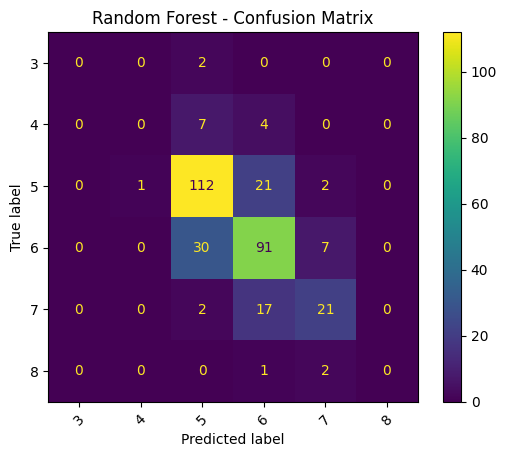

In [23]:
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

disp = ConfusionMatrixDisplay.from_predictions(
    y_test, y_pred_rf,
    display_labels=sorted(y_test.unique()),
    xticks_rotation=45
)
plt.title("Random Forest - Confusion Matrix")
plt.show()


In [24]:
import pandas as pd
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

models = {
    "Naive Bayes": y_pred_nb,
    "Decision Tree": y_pred_dt,
    "KNN": y_pred_knn,
    "Random Forest": y_pred_rf
}

rows = []
for name, pred in models.items():
    rows.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, pred),
        "Precision (weighted)": precision_score(y_test, pred, average="weighted", zero_division=0),
        "Recall (weighted)": recall_score(y_test, pred, average="weighted", zero_division=0),
        "F1 (weighted)": f1_score(y_test, pred, average="weighted", zero_division=0),
        "F1 (macro)": f1_score(y_test, pred, average="macro", zero_division=0)
    })

results_df = pd.DataFrame(rows).sort_values("F1 (weighted)", ascending=False)
results_df


,Model,Accuracy,Precision (weighted),Recall (weighted),F1 (weighted),F1 (macro)
3,Random Forest,0.700000,0.664784,0.700000,0.680191,0.342179
1,Decision Tree,0.618750,0.618539,0.618750,0.617523,0.437185
2,KNN,0.550000,0.526263,0.550000,0.535968,0.263192
0,Naive Bayes,0.503125,0.504065,0.503125,0.503340,0.260170


alcohol                 0.150278
sulphates               0.110612
total sulfur dioxide    0.106832
volatile acidity        0.102698
density                 0.089647
chlorides               0.078236
fixed acidity           0.076750
citric acid             0.073079
pH                      0.073020
residual sugar          0.071164
free sulfur dioxide     0.067683
dtype: float64


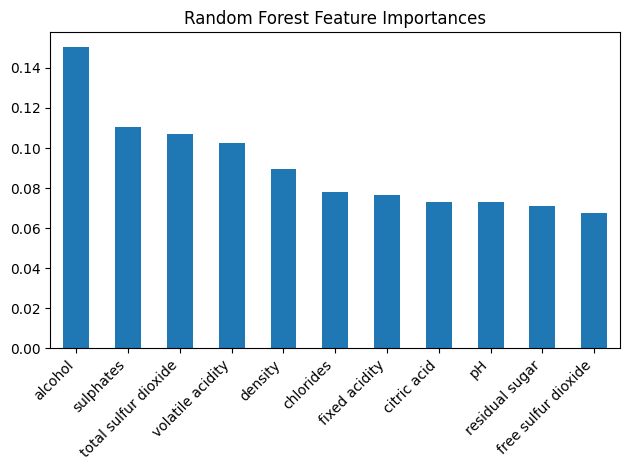

In [25]:
import pandas as pd

importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
print(importances)

importances.plot(kind="bar")
plt.title("Random Forest Feature Importances")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()
